In [37]:
# Import the libraries
import pandas as pd
import seaborn as sns
import plotly.express as px
from ucimlrepo import fetch_ucirepo 
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [38]:
# Create the dataframe
glass_identification = fetch_ucirepo(id=42) 
df = pd.DataFrame(glass_identification.data.features)
df['target'] = glass_identification.data.targets

In [39]:
X = df.drop('target', axis='columns')
y = df['target']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)


0.9069767441860465

In [41]:
rfc.predict([[1.51618, 13.53, 3.55, 1.54, 73.48, 0.67, 8.65, 0.00, 0.00]])[0]

c:\Users\Farhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



2

In [42]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [43]:
df['RI'].min()

1.51115

<AxesSubplot: >

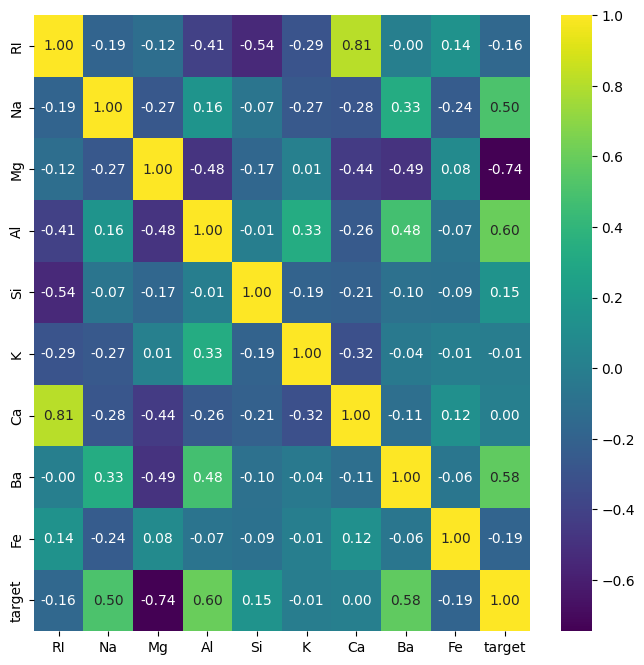

In [44]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")

In [46]:
rfc.predict([[1.51618, 13.53, 3.55, 1.54, 73.48, 0.67, 8.65, 0.00, 0.00]])[0]

c:\Users\Farhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



2

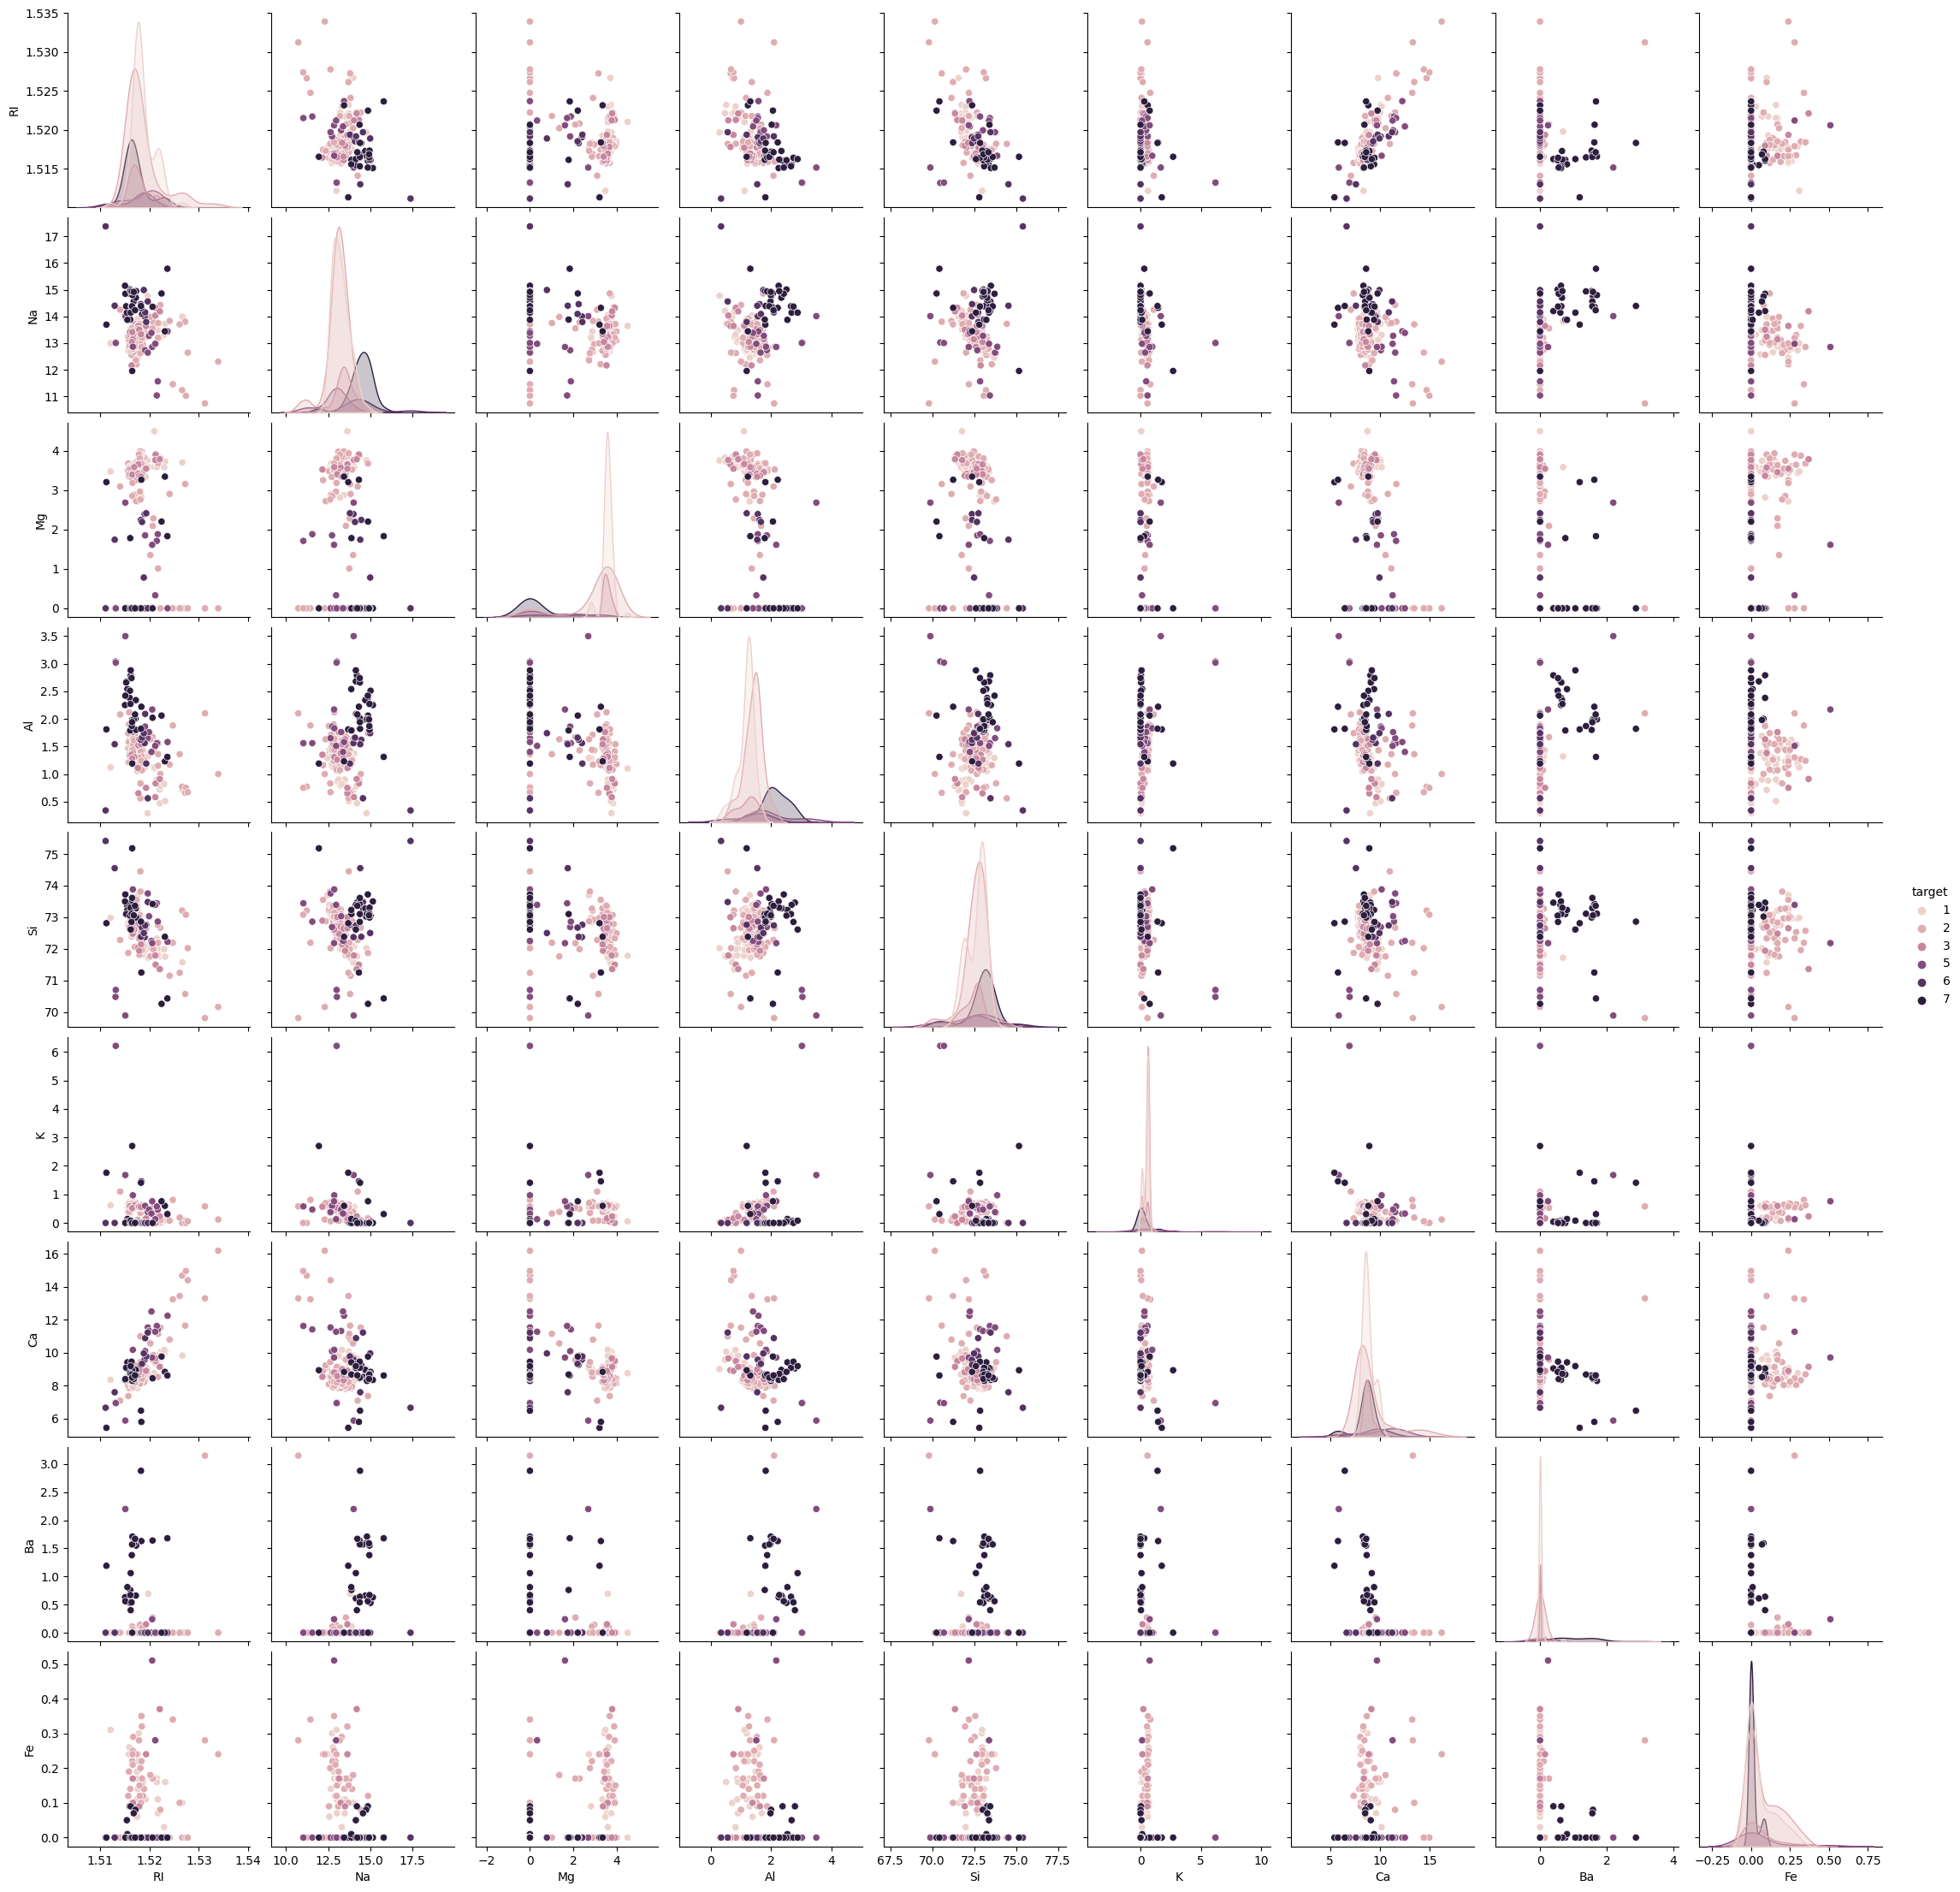

In [47]:
sns.pairplot(df, hue='target')

<AxesSubplot: >

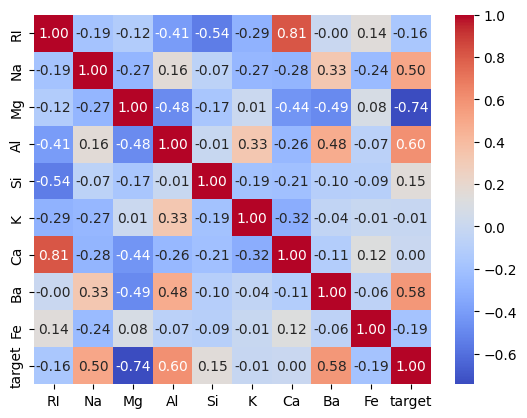

In [48]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")


Text(0, 0.5, 'Count')

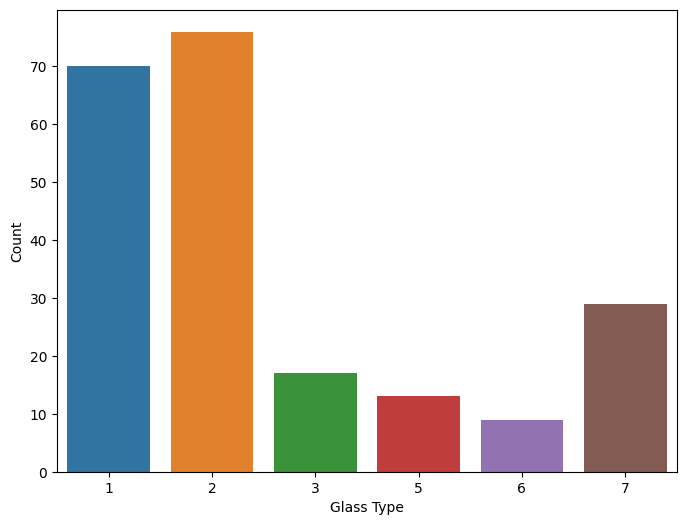

In [49]:
counts = df['target'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel('Glass Type')
plt.ylabel('Count')

In [68]:
fig = px.box(df.drop('target', axis='columns'), points="all")
fig.update_traces(quartilemethod="exclusive")
fig.show()